# EDA

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [71]:
df= pd.read_csv('cleaned_data.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


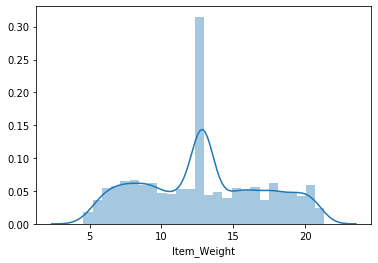

In [72]:
sns.distplot(df["Item_Weight"])

# We see that since we filled most of the missing values by the mean of the values, the count as mean is more 

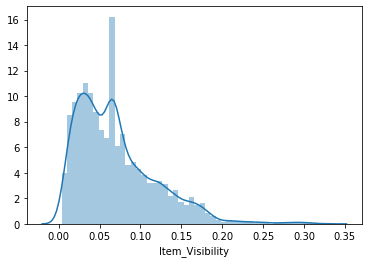

In [48]:
sns.distplot(df["Item_Visibility"])

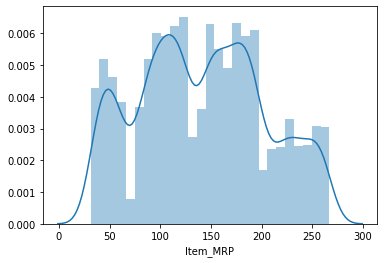

In [49]:
sns.distplot(df["Item_MRP"])

# The price ranges from around 30 to 260

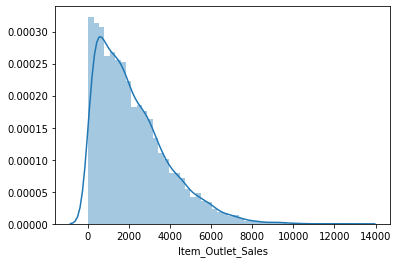

In [24]:
sns.distplot(df["Item_Outlet_Sales"])

# We will need to normalize this, so using log transformation

In [50]:
df["Item_Outlet_Sales" ]=np.log(1+df["Item_Outlet_Sales"])

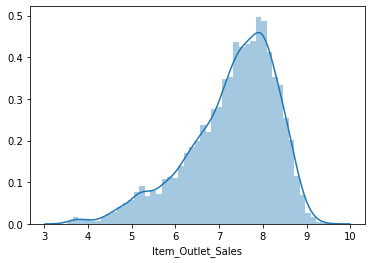

In [51]:
sns.distplot(df["Item_Outlet_Sales"])

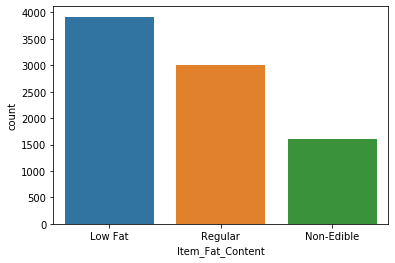

In [52]:
sns.countplot(df["Item_Fat_Content"])

### Most of the products have low fat content

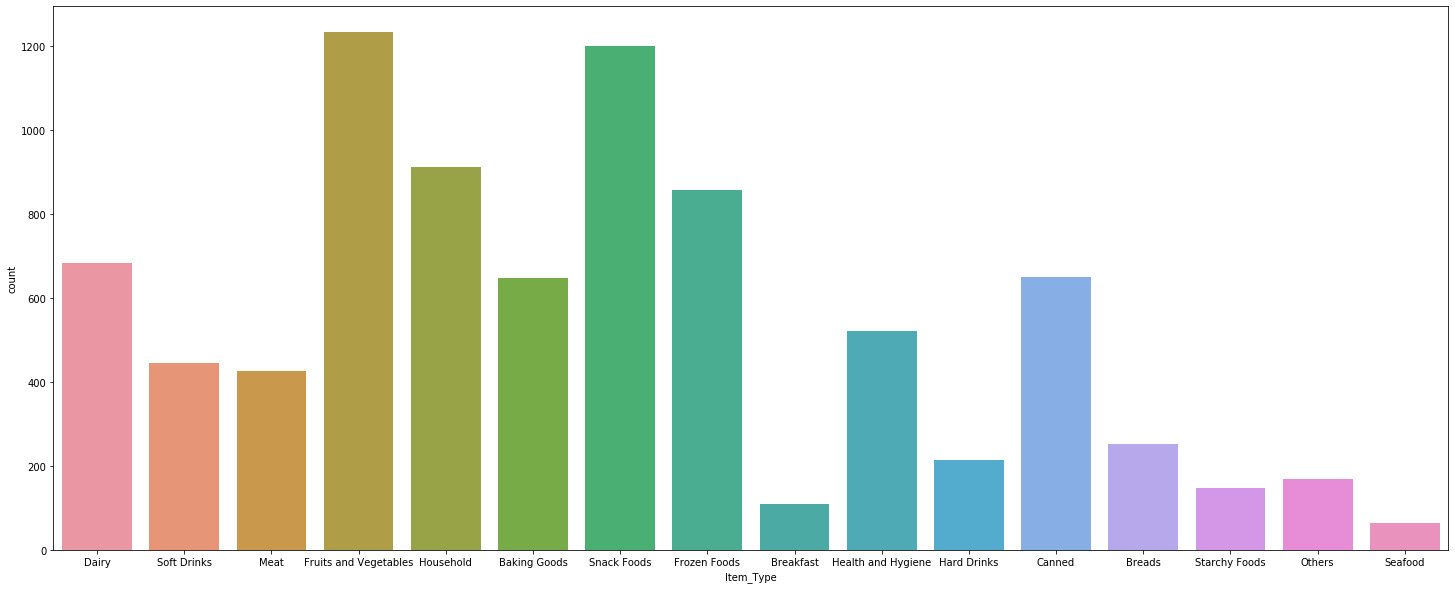

In [53]:
plot.figure(figsize=(25,10))
sns.countplot(df["Item_Type"])

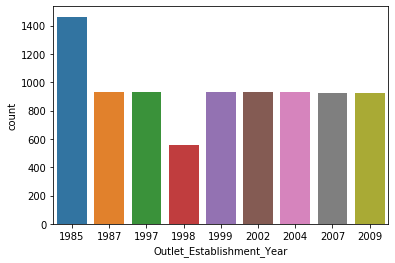

In [54]:
sns.countplot(df["Outlet_Establishment_Year"])

In [34]:
## 1985 has more no. of stores while 1998 has less

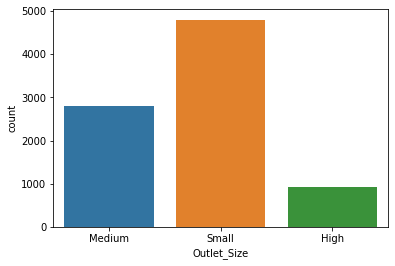

In [55]:
sns.countplot(df["Outlet_Size"])

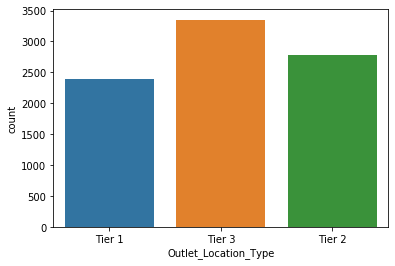

In [56]:
sns.countplot(df["Outlet_Location_Type"])

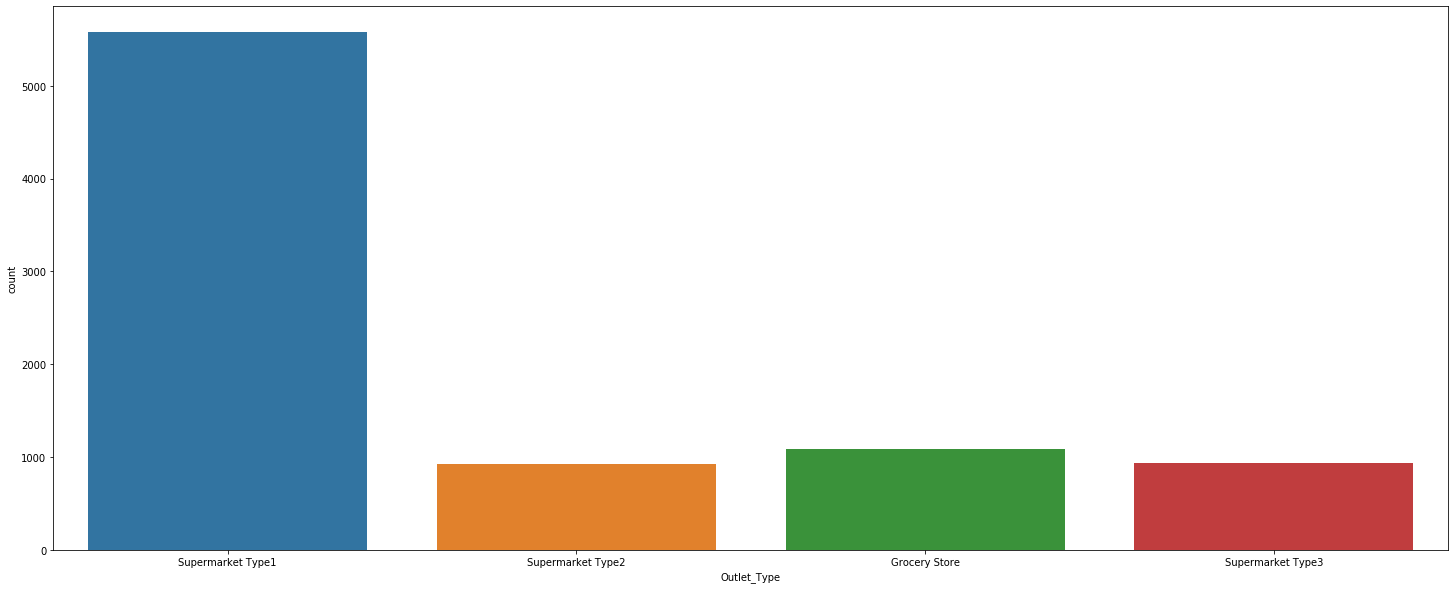

In [65]:
plot.figure(figsize=(25,10))
sns.countplot(df["Outlet_Type"])

In [73]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.017450,0.024756,-0.008301,0.011550,0.008301
Item_Visibility,-0.017450,1.000000,-0.005259,-0.078355,-0.134138,0.078355
Item_MRP,0.024756,-0.005259,1.000000,0.005020,0.567574,-0.005020
Outlet_Establishment_Year,-0.008301,-0.078355,0.005020,1.000000,-0.049135,-1.000000
Item_Outlet_Sales,0.011550,-0.134138,0.567574,-0.049135,1.000000,0.049135
Outlet_Years,0.008301,0.078355,-0.005020,-1.000000,0.049135,1.000000


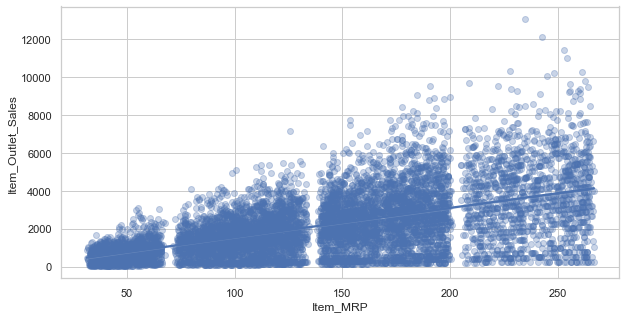

In [76]:
# MRP vs Outlet sales

plot.figure(figsize=(10,5))
sns.set(style='whitegrid',color_codes=True)
sns.regplot(x='Item_MRP',y='Item_Outlet_Sales',data=df,scatter_kws={'alpha':0.3})

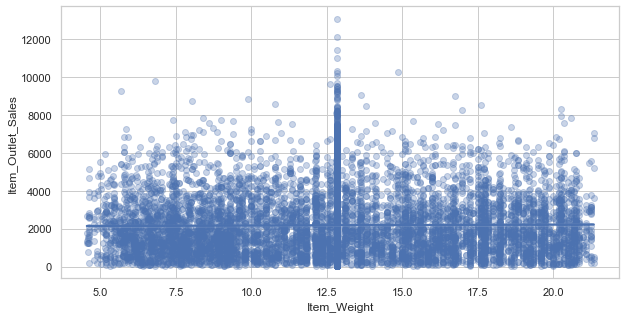

In [78]:
plot.figure(figsize=(10,5))
sns.set(style='whitegrid',color_codes=True)
sns.regplot(x='Item_Weight',y='Item_Outlet_Sales',data=df,scatter_kws={'alpha':0.3})

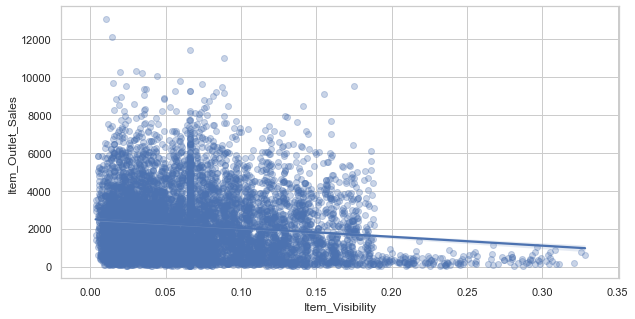

In [79]:
plot.figure(figsize=(10,5))
sns.set(style='whitegrid',color_codes=True)
sns.regplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df,scatter_kws={'alpha':0.3})

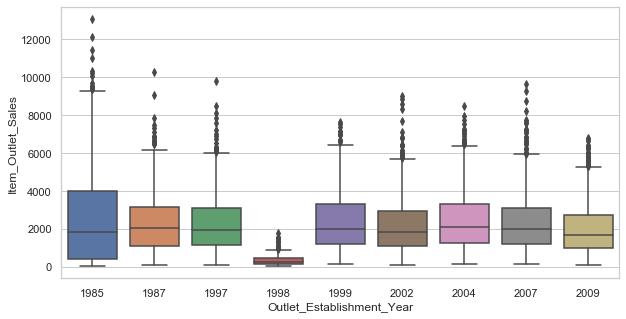

In [80]:

plot.figure(figsize=(10,5))
sns.set(style='whitegrid',color_codes=True)
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=df)

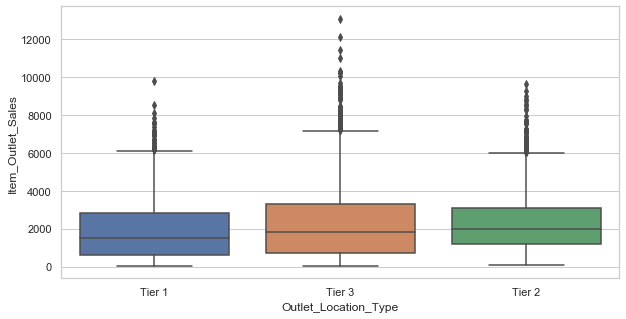

In [82]:
plot.figure(figsize=(10,5))
sns.set(style='whitegrid',color_codes=True)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df)

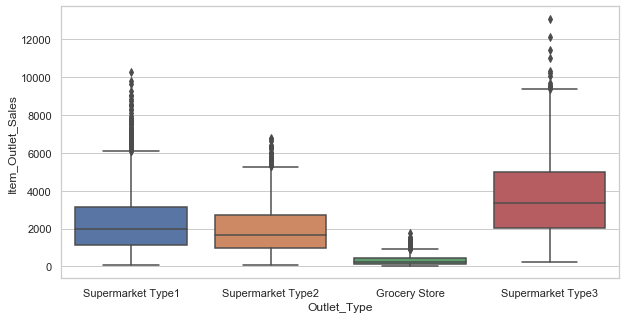

In [83]:

plot.figure(figsize=(10,5))
sns.set(style='whitegrid',color_codes=True)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df)

In [ ]:
# Correlation Matrix

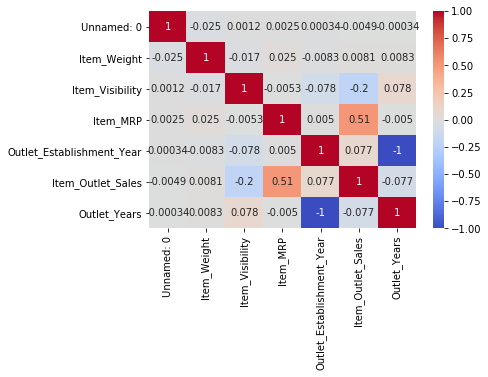

In [39]:
corr= df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

Item_Mrp is highly impacting item outlet sales, outlet establishment year is negatively correlated with outlet yers_ so that can be removed